</br>

# outline

#### [1. Understand Categorical data columns](#1)
            
#### [2. Understand Numerical data columns](#2)

#### [3. Graphical summaries](#3)
          
#### [4. Stratification](#4)

</br>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
da = pd.read_csv("nhanes_2015_2016.csv")

</br>

<a name=1></a>
**Understand Categorical data columns**

- Step 1: check frequency distribution of 'DMDEDUC2' 
- Step 2: check missing value
- Step 3: replace integer codes with a text label - for gender - 'RIAGENDR'

In [8]:
da.DMDEDUC2.value_counts()

4.0    1621
5.0    1366
3.0    1186
1.0     655
2.0     643
9.0       3
Name: DMDEDUC2, dtype: int64

In [30]:
print(f"data count by using value_counts: {da.DMDEDUC2.value_counts().sum()}")
print(f"the actual shape: {da.shape}")
print(f"null count: {pd.isnull(da.DMDEDUC2).sum()}")

data count by using value_counts: 5474
the actual shape: (5735, 30)
null count: 261


In [24]:
da["DMDEDUC2x"] = da.DMDEDUC2.replace({1: "<9", 2: "9-11", 3: "HS/GED", 4: "Some college/AA", 5: "College", 
                                       7: "Refused", 9: "Don't know"})
da["RIAGENDRx"] = da.RIAGENDR.replace({1: "Male", 2: "Female"})

print(f"Total count: {da.RIAGENDRx.value_counts().sum()}")
print(da.RIAGENDRx.value_counts())

Total count: 5735
Female    2976
Male      2759
Name: RIAGENDRx, dtype: int64


In [26]:
x = da.DMDEDUC2x.value_counts()
print(f"Total count: {x.sum()}")
print(x / x.sum())

Total count: 5474
Some college/AA    0.296127
College            0.249543
HS/GED             0.216661
<9                 0.119657
9-11               0.117464
Don't know         0.000548
Name: DMDEDUC2x, dtype: float64


In [27]:
da["DMDEDUC2x"] = da.DMDEDUC2x.fillna("Missing")
x = da.DMDEDUC2x.value_counts()
print(f"Total count: {x.sum()}")
print(x / x.sum())

Total count: 5735
Some college/AA    0.282650
College            0.238187
HS/GED             0.206800
<9                 0.114211
9-11               0.112119
Missing            0.045510
Don't know         0.000523
Name: DMDEDUC2x, dtype: float64


</br>

<a name=2></a>
**Understand Numerical data columns**

- Step 1: drop na and check stats of body weight -'BMXWT'
- Step 2: check certain stats by using Pandas or Numpy
- Step 3: and / or

In [32]:
da.BMXWT.dropna().describe()

count    5666.000000
mean       81.342676
std        21.764409
min        32.400000
25%        65.900000
50%        78.200000
75%        92.700000
max       198.900000
Name: BMXWT, dtype: float64

In [43]:
x = da.BMXWT.dropna()
print(f"count: {da.BMXWT.value_counts().sum()}")
print(f"mean by Pandas: {x.mean()}")
print(f"mean by Numpy: {np.mean(x)}")
print("  ")

# Median
print(f"median by Pandas: {x.median()}")
print(f"median by Numpy: {np.percentile(x,50)}")
print("  ")

# 75% percentile
print(f"75% percentile by Pandas: {x.quantile(0.75)}")
print(f"75% percentile by Numpy: {np.percentile(x,75)}")

count: 5666
mean by Pandas: 81.34267560889509
mean by Numpy: 81.34267560889509
  
median by Pandas: 78.2
median by Numpy: 78.2
  
75% percentile by Pandas: 92.7
75% percentile by Numpy: 92.7


In [44]:
np.mean((da.BPXSY1 >= 120) & (da.BPXSY2 <= 139))  # "&" means "and"

0.3741935483870968

In [45]:
a = (da.BPXSY1 >= 120) & (da.BPXSY2 <= 139)
b = (da.BPXDI1 >= 80) & (da.BPXDI2 <= 89)
print(np.mean(a | b))  # "|" means "or"

0.43975588491717527


</br>

<a name=3></a>
**Graphical summaries**

- Step 1: histogram body weight - 'BMXWT'
- Step 2: box plot - compare blood pressure btw the first and second systolic (BPXSY1, BPXSY2) and the first and second diastolic (BPXDI1, BPXDI2)

In [55]:
print(da.BMXWT.dropna().count())
print(da.BMXWT.count())

5666
5666


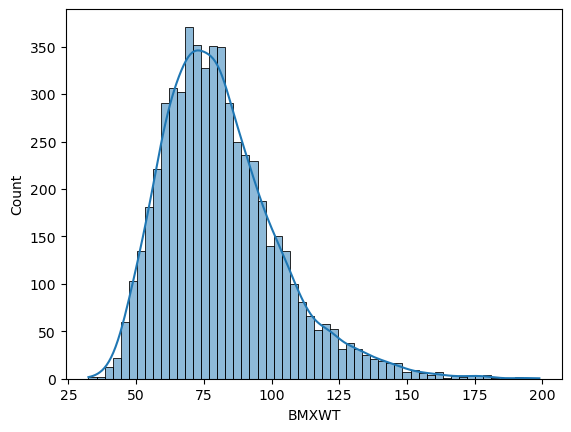

In [52]:
sns.histplot(da.BMXWT.dropna(), kde=True)
plt.show()

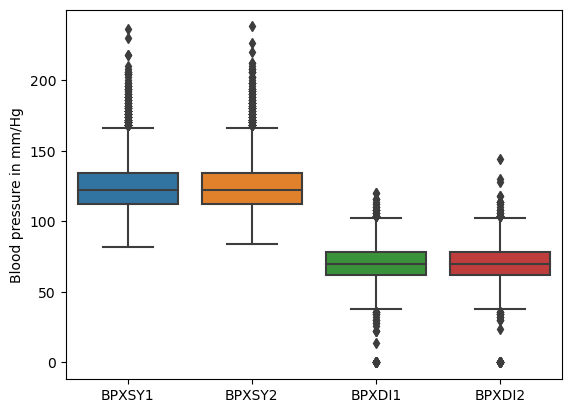

In [64]:
# "BPXSY1", "BPXSY2", "BPXDI1", "BPXDI2"
# y label: "Blood pressure in mm/Hg"
# Box Plot

bp = sns.boxplot(data=da.loc[:, ["BPXSY1", "BPXSY2", "BPXDI1", "BPXDI2"]]).set_ylabel("Blood pressure in mm/Hg")

</br>

<a name=4></a>
**Stratification**

- Graphic
    - Case 1: the first systolic blood pressure - 'BPXSY1' by age 'RIDAGEYR'
    - Case 2: 'BPXSY1' by age and gender
    - Case 3: 'BPXSY1' by gender and age
- Stats
    - Case 1: education (DMDEDUC2x) stats stratify by age
    - Case 2: education (DMDEDUC2x) stats stratify jointly by age and gender (pivot table, normalize, 3 decimal)

<AxesSubplot:xlabel='agegrp', ylabel='BPXSY1'>

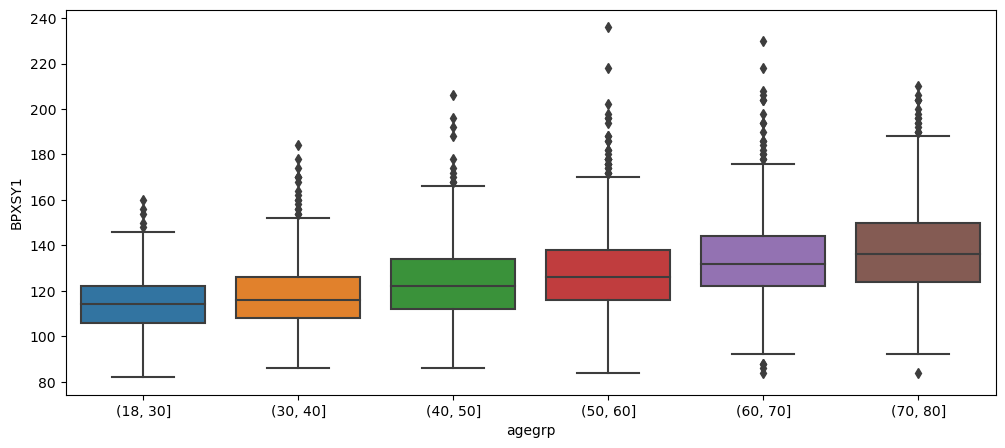

In [71]:
da["agegrp"] = pd.cut(da.RIDAGEYR, [18, 30, 40, 50, 60, 70, 80])
plt.figure(figsize=(12,5))
sns.boxplot(x="agegrp", y="BPXSY1", data=da)

<AxesSubplot:xlabel='agegrp', ylabel='BPXSY1'>

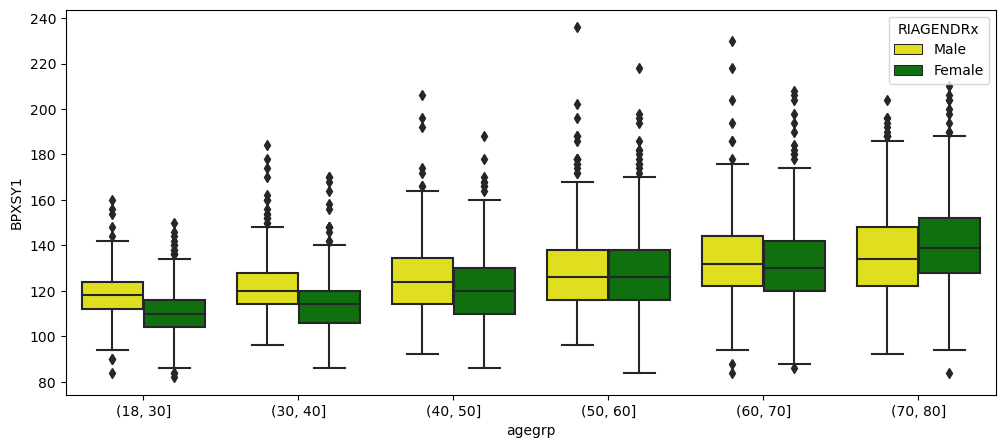

In [77]:
da["agegrp"] = pd.cut(da.RIDAGEYR, [18, 30, 40, 50, 60, 70, 80])
plt.figure(figsize=(12,5))
sns.boxplot(x="agegrp", y="BPXSY1", hue="RIAGENDRx", data=da, palette={"Male": "yellow", "Female": "green"})

[Text(0, 0.5, 'Gender'), Text(0.5, 0, 'Blood Pressure of systolic I')]

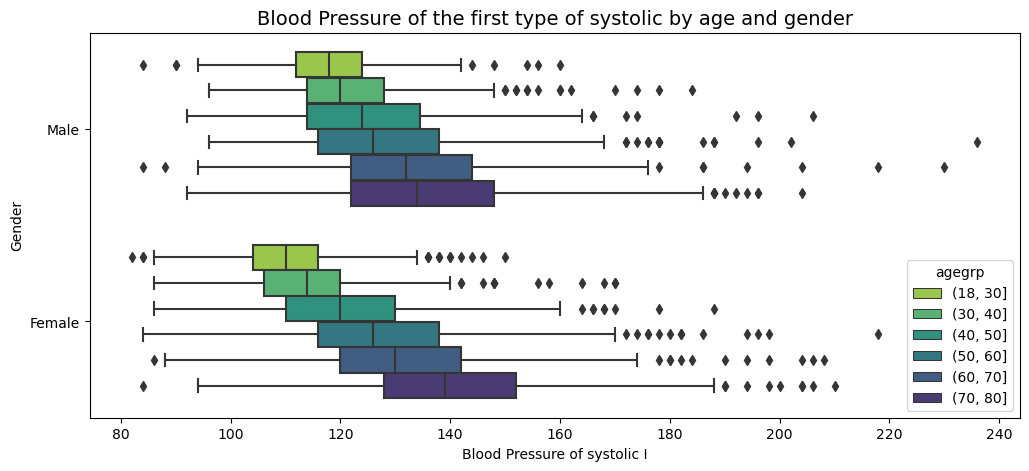

In [123]:
da["agegrp"] = pd.cut(da.RIDAGEYR, [18, 30, 40, 50, 60, 70, 80])
plt.figure(figsize=(12,5))
palette = sns.color_palette("viridis_r")
a = sns.boxplot(y="RIAGENDRx", x="BPXSY1", hue="agegrp", data=da, palette=palette)
a.set_title("Blood Pressure of the first type of systolic by age and gender", fontdict= {'fontsize': 14}) 
a.set(ylabel="Gender", xlabel="Blood Pressure of systolic I")

In [95]:
da.groupby("agegrp")["DMDEDUC2x"].value_counts()

agegrp    DMDEDUC2x      
(18, 30]  Some college/AA    364
          College            278
          HS/GED             237
          Missing            128
          9-11                99
          <9                  47
(30, 40]  Some college/AA    282
          College            264
          HS/GED             182
          9-11               111
          <9                  93
(40, 50]  Some college/AA    262
          College            260
          HS/GED             171
          9-11               112
          <9                  98
(50, 60]  Some college/AA    258
          College            220
          HS/GED             220
          9-11               122
          <9                 104
(60, 70]  Some college/AA    238
          HS/GED             192
          College            188
          <9                 149
          9-11               111
(70, 80]  Some college/AA    217
          HS/GED             184
          <9                 164
          College

In [105]:
# ~.loc[~...]: eliminate rare/missing values
dx = da.loc[~da.DMDEDUC2x.isin(["Don't know", "Missing"]), :]
dx = dx.groupby(["agegrp", "RIAGENDRx"])["DMDEDUC2x"]
dx = dx.value_counts()
dx = dx.unstack()
dx = dx.apply(lambda x: x/x.sum(), axis=1)
print(dx.to_string(float_format="%.3f"))

DMDEDUC2x           9-11    <9  College  HS/GED  Some college/AA
agegrp   RIAGENDRx                                              
(18, 30] Female    0.080 0.049    0.282   0.215            0.374
         Male      0.117 0.042    0.258   0.250            0.333
(30, 40] Female    0.089 0.097    0.314   0.165            0.335
         Male      0.151 0.103    0.251   0.227            0.269
(40, 50] Female    0.110 0.106    0.299   0.173            0.313
         Male      0.142 0.112    0.274   0.209            0.262
(50, 60] Female    0.117 0.102    0.245   0.234            0.302
         Male      0.148 0.123    0.231   0.242            0.256
(60, 70] Female    0.118 0.188    0.195   0.206            0.293
         Male      0.135 0.151    0.233   0.231            0.249
(70, 80] Female    0.105 0.225    0.149   0.240            0.281
         Male      0.113 0.180    0.237   0.215            0.255


</br>

</br>

</br>

</br>

In [110]:
da.BPXSY2.describe()

count    5535.000000
mean      124.783017
std        18.527012
min        84.000000
25%       112.000000
50%       122.000000
75%       134.000000
max       238.000000
Name: BPXSY2, dtype: float64

In [113]:
import scipy.stats as stats
stats.iqr(da["BPXSY2"].dropna())

22.0

<AxesSubplot:xlabel='BPXSY2', ylabel='Count'>

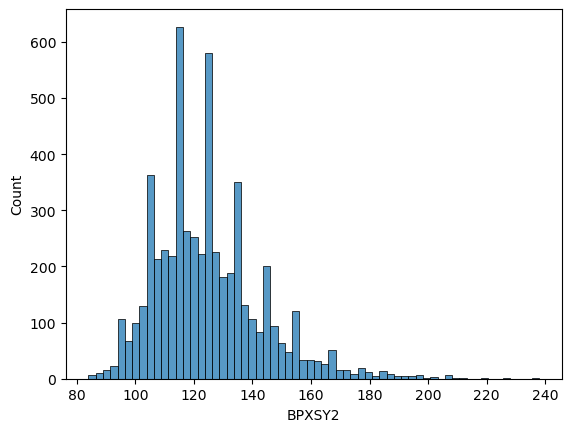

In [114]:
sns.histplot(da["BPXSY2"])